In [1]:
# Import necessary libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os


In [2]:
# Create reference to directories
source_dir = os.getcwd()
main_dir = os.path.abspath(os.path.join(source_dir, ".."))
data_dir = os.path.abspath(os.path.join(main_dir, "data"))

# Create references to filepaths
train_path = os.path.abspath(os.path.join(data_dir, "train.csv"))
test_path = os.path.abspath(os.path.join(data_dir, "test.csv"))


In [3]:
# Import dataset into pandas dataframe
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


In [4]:
# Display train and it's size
print(len(train_df))
train_df.head()


1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Display test and it's size
print(len(test_df))
test_df.head()


1459


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Check for missing values and compare it with the full dataset
train_df.isna().sum().sort_values(ascending=False).head(10) / len(train_df)


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
dtype: float64

In [7]:
# Features that aren't usable due to the percentage of missing values
remove_features = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]
# Drop the features
train_df = train_df.drop(columns=remove_features)
test_df = test_df.drop(columns=remove_features)

In [11]:
# Check for missing values for y value and id
print(train_df[["Id","SalePrice"]].isna().sum())
print(test_df[["Id"]].isna().sum())

Id           0
SalePrice    0
dtype: int64
Id    0
dtype: int64


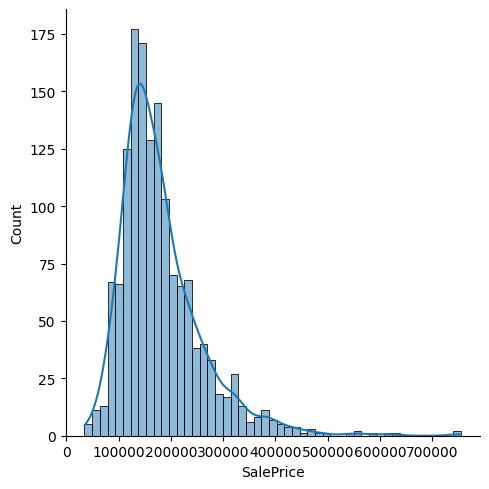

In [24]:
# Look at the distribution of SalePrice
sns.displot(train_df.SalePrice, kde = True)

Max SalePrice in dataset: 755000
Min SalePrice in dataset: 34900


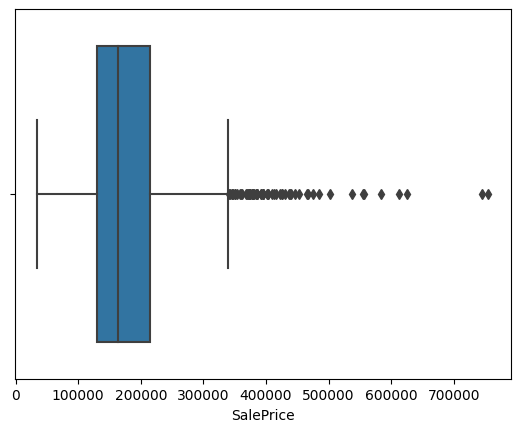

In [32]:
# Look at the boxplot of SalePrice
sns.boxplot(data=train_df,x=train_df['SalePrice'],orient = 'h')

max_saleprice = train_df.SalePrice.max()
min_saleprice = train_df.SalePrice.min()
print("Max SalePrice in dataset: %s" % max_saleprice)
print("Min SalePrice in dataset: %s" % min_saleprice)

# Observations for SalePrices
- Interquartile Range: 120k to 240k
- Outliers: Greater than 350k

- Maximum: 755k
- Minimum: 35k

In [40]:
# Calculate the number of data points that are outside the 1st and 3rd quartiles
third_quant = train_df.SalePrice.quantile(.75)
first_quant = train_df.SalePrice.quantile(.25)

upper_75 = train_df[train_df.SalePrice > third_quant]
lower_25 = train_df[train_df.SalePrice < first_quant]

print("Count of data points in the top 75: %s" % len(upper_75))
print("Count of data points in the low 25: %s" % len(lower_25))


Count of data points in the top 75: 362
Count of data points in the low 25: 365
